In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# We will use the function implemented in the last quiz
# Find best match
def find_best_match(patch, strip):
    # TODO: Find patch in strip and return column index (x value) of topleft corner
    deltas = []
    for i in range(strip.shape[1] - patch.shape[1]):
        deltas.append(np.sum((strip[:, i:i+patch.shape[1]] - patch)**2))
    return np.argmin(np.array(deltas))


def match_strips(strip_left, strip_right, b):
    # For each non-overlapping patch/block of width b in the left strip,
    # find the best matching position (along X-axis) in the right strip.
    # Return a vector of disparities (left X-position - right X-position).
    # Note: Only consider whole blocks that fit within image bounds.
    dispars = []
    for i in range(0, strip_left.shape[1] - b, b):
        patch = strip_left[:, i:i+b]
        best_x = find_best_match(patch, strip_right)
        dispars.append(i - best_x)
    return np.array([dispars])


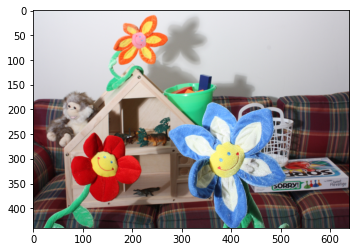

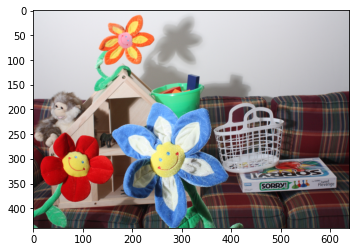

In [19]:
# Test code:

# Load images
left  = cv2.imread('images/flowers-left.png') [:, :, ::-1]
right = cv2.imread('images/flowers-right.png')[:, :, ::-1]
plt.figure()
plt.imshow(left)

plt.figure()
plt.imshow(right)

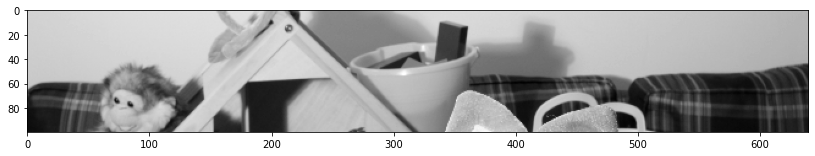

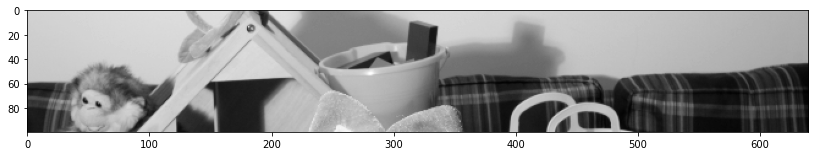

In [20]:
# Convert to grayscale, double, [0, 1] range for easier computation
left_gray = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY) / 255.
right_gray = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY) / 255.

# Define strip row (y) and square block size (b)
y = 120
b = 100

# Extract strip from left image
strip_left = left_gray[y: y + b, :]
size = (14, 32)
plt.figure(figsize=(size))
plt.imshow(strip_left, cmap='binary_r')

# Extract strip from right image
strip_right = right_gray[y: y + b, :]
plt.figure(figsize=(size))
plt.imshow(strip_right, cmap='binary_r')

In [21]:
# Now match these two strips to compute disparity values
disparity = match_strips(strip_left, strip_right, b)
print(disparity)

[[ 0 26 21 25 19 21]]


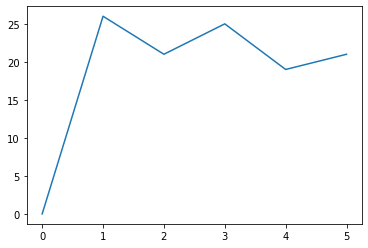

In [22]:
# Finally we plot the disparity values. Note that there may be some differences
# in the results shown in the quiz because we had to adapt the index values.
plt.plot(range(disparity.shape[1]), disparity[0])
plt.show()
plt.close('all')